Apply the following MAP estimators to 2D data.

In [22]:
#  Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Generate a 2D data set with noise.

In [23]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
data = np.exp(-(X**2 + Y**2)/2) + np.random.normal(0, 0.1, size=(100, 100))

Compute the Gaussian MAP estimators

In [24]:
mean = np.mean(data)
var = np.var(data)
cov = np.cov(data.T)

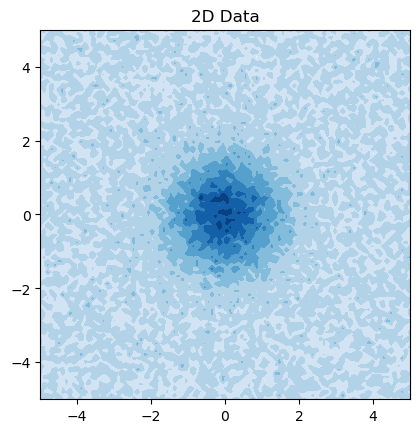

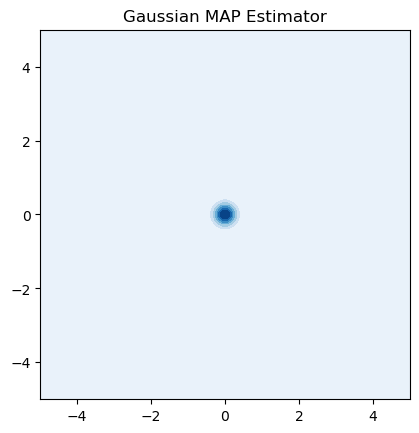

MAP Estimator Mean:  0.06280618623876337
MAP Estimator Variance:  0.03714226041512502
MAP Estimator Covariance:  [[ 8.39681496e-03 -4.40916164e-05 -2.25873306e-04 ...  1.26987706e-03
   6.89028845e-04  1.21305756e-03]
 [-4.40916164e-05  6.47520188e-03 -7.05877504e-04 ... -9.96515644e-04
  -1.32065625e-03  4.76275049e-04]
 [-2.25873306e-04 -7.05877504e-04  1.16055166e-02 ... -5.56305180e-04
  -4.32616020e-05 -5.27916688e-04]
 ...
 [ 1.26987706e-03 -9.96515644e-04 -5.56305180e-04 ...  9.61028395e-03
  -2.32545183e-04  8.24368043e-04]
 [ 6.89028845e-04 -1.32065625e-03 -4.32616020e-05 ... -2.32545183e-04
   9.90727101e-03 -1.44482998e-03]
 [ 1.21305756e-03  4.76275049e-04 -5.27916688e-04 ...  8.24368043e-04
  -1.44482998e-03  8.55026642e-03]]


In [25]:
# Plot the data and the estimated Gaussian distribution
fig, ax = plt.subplots()
ax.contourf(X, Y, data, cmap='Blues')
ax.set_aspect('equal', 'box')
ax.set_title('2D Data')
fig, ax = plt.subplots()
ax.contourf(X, Y, np.exp(-(X**2 + Y**2 - 2*mean)/2/var)/np.sqrt(2*np.pi*var), cmap='Blues')
ax.set_aspect('equal', 'box')
ax.set_title('Gaussian MAP Estimator')
plt.show()
print("MAP Estimator Mean: ", mean)
print("MAP Estimator Variance: ", var)
print("MAP Estimator Covariance: ", cov)

Define prior distribution parameters

In [26]:
data = np.random.multivariate_normal(mean=[2, 3], cov=[[1, 0.5], [0.5, 2]], size=100)
prior_mean = np.array([0, 0])
prior_cov = np.array([[1, 0], [0, 1]])
data.shape

(100, 2)

In [27]:
# Calculate posterior distribution parameters using MAP estimator
posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + (1/100) * np.cov(data.T))
posterior_mean = posterior_cov.dot(np.linalg.inv(prior_cov).dot(prior_mean) + (1/100) * np.mean(data, axis=0))

# Define 2D Gaussian distributions using the calculated parameters
prior_dist = multivariate_normal(mean=prior_mean, cov=prior_cov)
posterior_dist = multivariate_normal(mean=posterior_mean, cov=posterior_cov)

In [28]:
pos = np.dstack((X, Y))
prior_pdf = prior_dist.pdf(pos)
posterior_pdf = posterior_dist.pdf(pos)

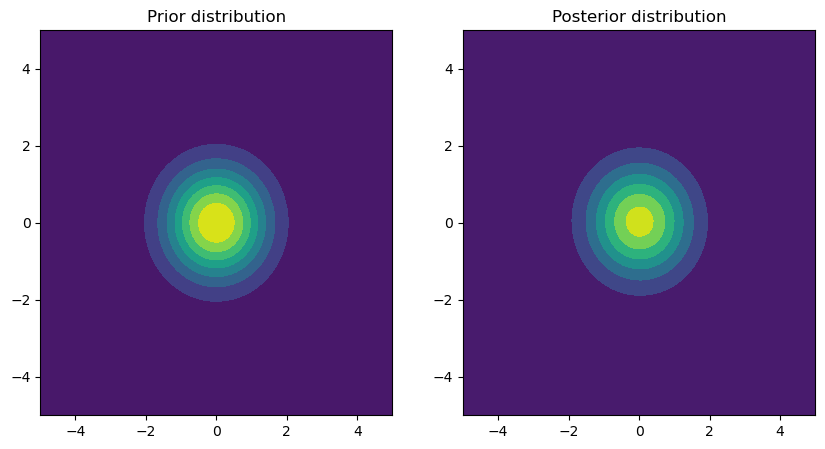

In [29]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].contourf(x, y, prior_pdf, cmap='viridis')
axs[0].set_title('Prior distribution')
axs[1].contourf(x, y, posterior_pdf, cmap='viridis')
axs[1].set_title('Posterior distribution')
plt.show()